# Data Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# %cd /content/drive/MyDrive/Face-Mask-Dataset

In [ ]:
# giải nén file images 
!unzip /content/drive/MyDrive/data-face-mask/12k-images.zip

In [ ]:
!unzip /content/drive/MyDrive/data-face-mask/51000.zip

In [ ]:
!unzip /content/drive/MyDrive/data-face-mask/incorrect-mask.zip

## Feature Extraction

In [ ]:
#import libraries
from sklearn.model_selection import train_test_split
import numpy as np
import os
import PIL
import cv2
import pickle

In [ ]:
DIRECTORY = "/content/drive/MyDrive/data-face-mask/Face-Mask-Dataset" 

CATEGORIES = ['WithoutMask','IncorrectlyWornMask', 'WithMask']
IMG_SIZE = 64 # IMG_SIZE = 224 alternative size

In [ ]:
#data
X = []
#labels(0,1,2)
y = []

In [ ]:
def create_data():
    for category in CATEGORIES:
        path = os.path.join(DIRECTORY, category)
        class_num_label = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                img_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                X.append(img_array)
                y.append(class_num_label)
            except Exception as e:
                pass
            
create_data()

## Convert to Numpy Array

In [ ]:
# Get images as a 4,096 feature set
SAMPLE_SIZE = len(y)
data = np.array(X).flatten().reshape(SAMPLE_SIZE, IMG_SIZE*IMG_SIZE) # pixel-features

# Turn X and y into numpy arrays
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE) # images
y = np.array(y) # target

print("Features, X shape: ", X.shape)
print("Target, y shape: ", y.shape)
print("Data shape: ", data.shape)

Features, X shape:  (17836, 64, 64)
Target, y shape:  (17836,)
Data shape:  (17836, 4096)


## Plot Dataset Images

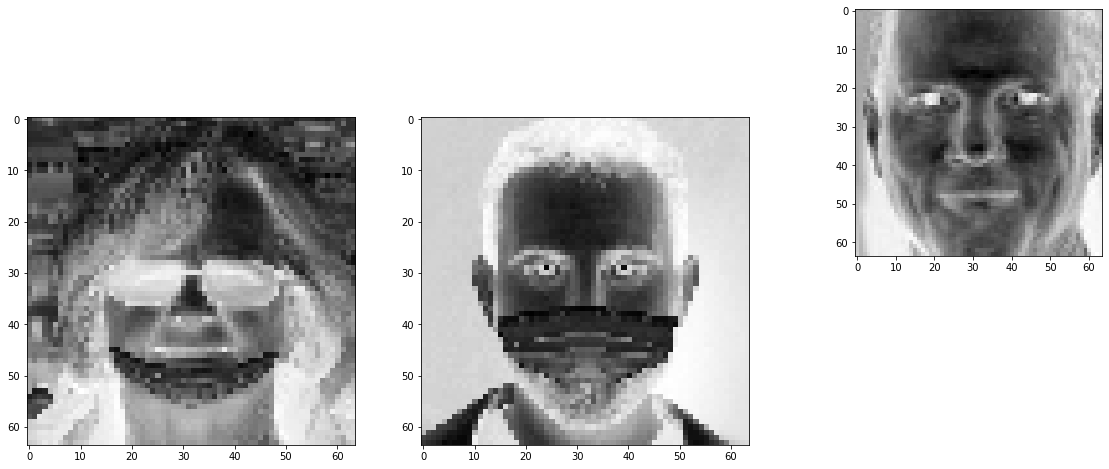

In [ ]:
import matplotlib.pyplot as plt # to plot inage, graph
%matplotlib inline

plt.figure(figsize=(20,10))
columns = 3
for i in range(3):
    plt.subplot(3 / columns + 1, columns, i + 1)
    plt.imshow(X[i],cmap=plt.cm.gray_r,interpolation='nearest')

j = 0
# column = 2
for i in range(6000, 6002):
    plt.subplot(2 / columns + 1, columns, j + 1)
    j = j+1
    plt.imshow(X[i],cmap=plt.cm.gray_r,interpolation='nearest')

## Save Dataset as Pickles


In [ ]:
#Saves us from having to regenerate our data by saving our data
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_out = open("data.pickle", "wb")
pickle.dump(data, pickle_out)
pickle_out.close()

## Load Pickles

In [ ]:
%cd /content/drive/MyDrive/data-face-mask/Face-Mask-Dataset

/content/drive/MyDrive/data-face-mask/Face-Mask-Dataset


In [ ]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)
pickle_in = open("data.pickle", "rb")
data = pickle.load(pickle_in)

## Total Classification Counts

In [ ]:
print('# of Samples:', len(y))
print('# of Without A Mask:', (y == 0).sum())
print('# of Incorrectly Worn Mask:', (y == 1).sum())
print('# of With A Mask:', (y == 2).sum())

# of Samples: 17836
# of Without A Mask: 5909
# of Incorrectly Worn Mask: 6044
# of With A Mask: 5883


## Exploratory Data Analysis


In [ ]:
import pandas as pd

In [ ]:
# convert Numpy Array sang Data frame

# Get Column Names
cols = []
for i in range(0, len(data[0])):
    cols.append("P" + str(i))

# Convert to Dataframe
numpy_data = data
X = pd.DataFrame(data=numpy_data, columns=[cols])
print(X)
print(y)

        P0   P1   P2   P3   P4   P5  ... P4090 P4091 P4092 P4093 P4094 P4095
0      147  148  147  146  146  146  ...   162   147   151   138   155   154
1      244  215  196  173  139  141  ...   165   160   168   164   159   146
2       90   93   90   93   85   80  ...    99   136    86    35    29    34
3       79   79   81   82   81   86  ...   240   241   240   237   232   227
4      128  115  107  137  101   88  ...    71    66    78    79    96    74
...    ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   ...   ...
17831  208  208  209  209  210  210  ...    49    71    77   121   167   171
17832  253  254  255  255  255  255  ...    85    63    54    50    45    44
17833  183  161   96   88   98  131  ...    57    40    25   172   232   238
17834  220  187  118   68   49   42  ...    21    19    15    18    25    28
17835   70  130  190   50   19  102  ...   169   163   156   156   156   156

[17836 rows x 4096 columns]
       Mask_Target
0                0
1        

In [ ]:
y = pd.DataFrame(data=y, columns=["Mask_Target"])
print(y.head())

   Mask_Target
0            0
1            0
2            0
3            0
4            0


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from collections import Counter
import os

import torch
from torchvision import datasets,transforms,models
from torch.utils.data import Dataset,DataLoader
from PIL import Image

import sys
import torch.optim as optim

In [ ]:
Items =  ['WithoutMask','IncorrectlyWornMask', 'WithMask']

In [ ]:
values = [(y == 0).sum(), (y == 1).sum(), (y == 2).sum()]

In [ ]:
print(Items,'\n',values)

['WithoutMask', 'IncorrectlyWornMask', 'WithMask'] 
 [5909, 6044, 5883]


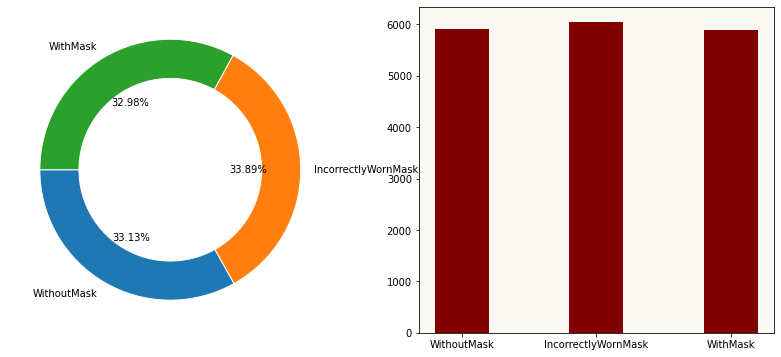

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(14,6))
background_color = '#faf9f4'
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color) 
ax1.pie(values, wedgeprops=dict(width=0.3, edgecolor='w') ,
        labels=Items, radius=1, startangle = 180, autopct='%1.2f%%')

ax2 = plt.bar(Items, list(values),
              color ='maroon',width = 0.4)
   
plt.show()

## Split Train and Test

In [ ]:
# Split our data into testing and training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Print the length and width of our testing data.
print('Length of our Training data: ',len(X_train), '\nLength of our Testing data: ',len(X_test))

Length of our Training data:  14268 
Length of our Testing data:  3568


# Tạo data Test_bias


In [ ]:
DIRECTORY_BIAS = "/content/drive/MyDrive/data-face-mask/Face-Mask-Dataset/Test-bias" # MacOS

CATEGORIES_BIAS = ['WithoutMask','IncorrectlyWornMask', 'WithMask']
IMG_SIZE = 64 # IMG_SIZE = 64/4 alternative size

In [ ]:
%cd /content/drive/MyDrive/data-face-mask/Face-Mask-Dataset/

/content/drive/MyDrive/data-face-mask/Face-Mask-Dataset


In [ ]:
!ls /content/drive/MyDrive/data-face-mask/Face-Mask-Dataset/Test-bias/

IncorrectlyWornMask  WithMask  WithoutMask


In [ ]:
#data
X_test_bias = []
#labels(0,1,2)
y_test_bias = []

In [ ]:
def create_data_test():
    for category in CATEGORIES_BIAS:
        path = os.path.join(DIRECTORY_BIAS, category)
        class_num_label = CATEGORIES_BIAS.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                img_array = cv2.resize(img_array, (64,64), interpolation=cv2.INTER_AREA)
                X_test_bias.append(img_array)
                y_test_bias.append(class_num_label)
            except Exception as e:
                pass
            
create_data_test()

In [ ]:
len(y_test_bias)

509

In [ ]:
len(X_test_bias)

509

In [ ]:
SAMPLE_SIZE_TEST = len(y_test_bias)
data_test = np.array(X_test_bias).flatten().reshape(SAMPLE_SIZE_TEST, IMG_SIZE*IMG_SIZE) # pixel-features

# Turn X and y into numpy arrays
X_test_bias = np.array(X_test_bias).reshape(-1, IMG_SIZE, IMG_SIZE) # images
y_test_bias = np.array(y_test_bias) # target

print("Features, X_test_bias shape: ", X_test_bias.shape)
print("Target, y_test_bias shape: ", y_test_bias.shape)
print("data_test shape: ", data_test.shape)

Features, X_test_bias shape:  (509, 64, 64)
Target, y_test_bias shape:  (509,)
data_test shape:  (509, 4096)


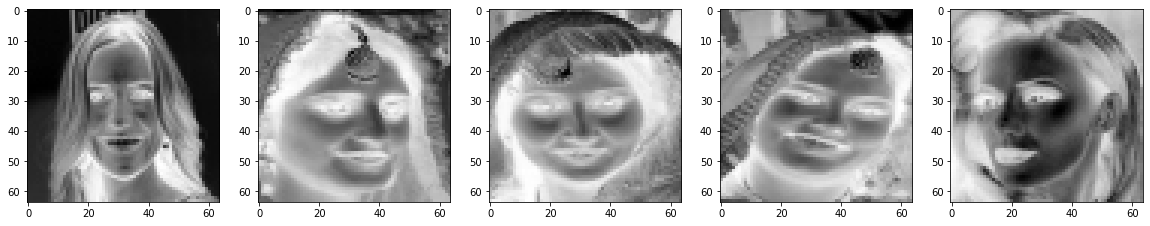

In [ ]:
import matplotlib.pyplot as plt # to plot inage, graph
%matplotlib inline

plt.figure(figsize=(20,10))
columns = 5
for i in range(5):
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.imshow(X_test_bias[i],cmap=plt.cm.gray_r,interpolation='nearest')

In [ ]:
%cd /content/drive/MyDrive/data-face-mask/Face-Mask-Dataset

/content/drive/MyDrive/data-face-mask/Face-Mask-Dataset


In [ ]:
#Saves us from having to regenerate our data by saving our data
pickle_out = open("X_test_bias.pickle", "wb")
pickle.dump(X_test_bias, pickle_out)
pickle_out.close()

pickle_out = open("y_test_bias.pickle", "wb")
pickle.dump(y_test_bias, pickle_out)
pickle_out.close()

pickle_out = open("data_test.pickle", "wb")
pickle.dump(data_test, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("X_test_bias.pickle", "rb")
X_test_bias = pickle.load(pickle_in)
pickle_in = open("y_test_bias.pickle", "rb")
y_test_bias = pickle.load(pickle_in)
pickle_in = open("data_test.pickle", "rb")
data_test = pickle.load(pickle_in)

In [ ]:
print('# of Samples:', len(y_test_bias))
print('# of Without A Mask:', (y_test_bias == 0).sum())
print('# of Incorrectly Worn Mask:', (y_test_bias == 1).sum())
print('# of With A Mask:', (y_test_bias == 2).sum())

# of Samples: 509
# of Without A Mask: 152
# of Incorrectly Worn Mask: 144
# of With A Mask: 213
